### **QUESTÃO 1**

**REGRESSÃO LINEAR MÚLTIPLA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados a partir de um arquivo CSV
data = pd.read_csv('BostonHousing.csv', header=(0))

# remove linhas com valores NaN
data = data.dropna()

# remove a primeira coluna já que não a usaremos
data = data.drop(data.columns[[0]], axis=1)

# define a variavel de saida como a ultima coluna do dataset
ylabel = data.columns[-1]

# imprime o número de observações e atributos no dataset
print('Número de observações e atributos:', data.shape)

# cria uma lista com os nomes das colunas (rótulos)
list_labels = list(data.columns)

# exibe as 10 primeiras linhas do dataset
data.head(10)

Número de observações e atributos: (506, 13)


,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [2]:
# converte os dados de um DataFrame para um array
data = data.to_numpy()

# obtem o numero de linhas e colunas no array de dados
nrow, ncol = data.shape

# extrai a ultima coluna dos dados, que sera a variável de saída (y)
y = data[:, -1]

# extrai todas as colunas exceto a ultima, que serao as variaveis preditoras (x)
X = data[:, 0:ncol-1]

In [5]:
# importa a função para dividir os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split

# define a fracao de elementos que serao utilizados no conjunto de teste
p = 0.3 # 30% dos dados

# divide os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

# inicializa o modelo de regressao linear multipla
lm = LinearRegression()

# ajusta o modelo aos dados de treinamento
lm.fit(x_train, y_train)

# faz previsões no conjunto de teste usando o modelo ajustado
y_pred = lm.predict(x_test)

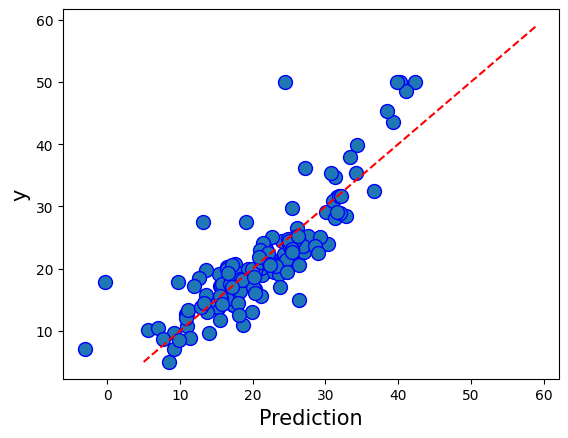

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# cria uma nova figura para o grafico
fig = plt.figure()

# plota os valores preditos x reais em um grafico de dispersao
l = plt.plot(y_pred, y_test, 'bo')  # 'bo' indica marcadores azuis

# ajusta o tamanho dos marcadores no grafico
plt.setp(l, markersize=10)

# define a cor interna dos marcadores
plt.setp(l, markerfacecolor='C0')

# adiciona rótulo ao eixo y
plt.ylabel("y", fontsize=15)

# adiciona rótulo ao eixo x
plt.xlabel("Prediction", fontsize=15)

# gera uma linha de referência (linha y=x) para comparar predições x valores reais
xl = np.arange(min(y_test), 1.2*max(y_test), (max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')  # 'r--' indica uma linha tracejada vermelha

# exibe o grafico
plt.show(True)

In [8]:
# importa a funcao para calcular o coeficiente de determinação R²
from sklearn.metrics import r2_score

# importa a funcao para calcular o erro quadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# calcula o coeficiente de determinacao R² para avaliar o ajuste do modelo
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

# calcula o erro quadratico medio (MSE) entre os valores preditos e os reais
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)  # exibe o MSE (quanto menor, melhor o ajuste)

R2: 0.7150613796634294
RSME: 21.231658648115065


**RIDGE REGRESSION**

In [10]:
from sklearn.model_selection import train_test_split

# define a fração de elementos que serao utilizados no conjunto de teste
p = 0.3  # fração de 30% dos dados

# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

# inicializa o escalador padrao para normalizar os dados (média 0 e variância 1)
scaler = StandardScaler().fit(X_train)

# aplica a normalizacao aos dados de treinamento
X_train = scaler.transform(X_train)

# aplica a mesma normalizacao aos dados de teste
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# inicializa o modelo de regressao Ridge com alpha = 0 (equivalente a regressão linear simples)
ridge = Ridge(alpha=0)

# ajusta o modelo Ridge aos dados de treinamento
ridge.fit(X_train, y_train)

# faz previsoes no conjunto de teste usando o modelo ajustado
y_pred = ridge.predict(X_test)

# calcula o coeficiente de determinação R² para avaliar o ajuste do modelo
R2 = r2_score(y_test, y_pred)
print('R2:', R2)  # exibe o valor de R² (quanto mais próximo de 1, melhor o ajuste)

# calcula o erro quadrático medio (MSE) entre os valores preditos e os reais
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)  # exibe o MSE (quanto menor, melhor o ajuste)

R2: 0.7150613796634313
RSME: 21.23165864811492


In [13]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# inicializa o modelo de regressao Ridge com alpha = 50 (penalização maior)
ridge2 = Ridge(alpha=50)

# ajusta o modelo Ridge aos dados de treinamento
ridge2.fit(X_train, y_train)

# faz previsoes no conjunto de teste usando o modelo ajustado
y_pred = ridge2.predict(X_test)

# calcula o coeficiente de determinação R² para avaliar o ajuste do modelo
R2 = r2_score(y_test, y_pred)
print('R2:', R2)  # exibe o valor de R² (quanto mais próximo de 1, melhor o ajuste)

# calcula o erro quadratico medio (MSE) entre os valores preditos e os reais
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)  # exibe o MSE (quanto menor, melhor o ajuste)

R2: 0.6980065115078494
RSME: 22.50246966888917


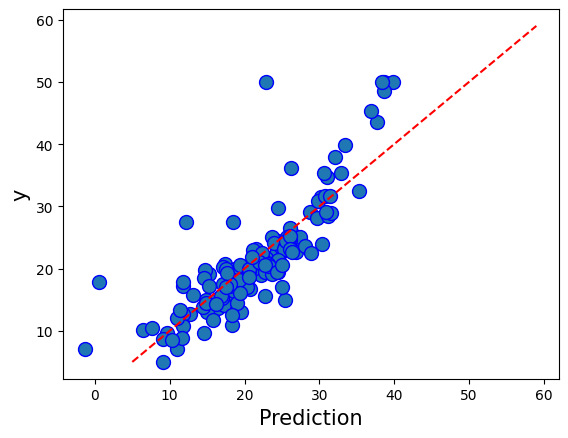

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# cria uma nova figura para o grafico
fig = plt.figure()

# plota os valores preditos x valores reais em um gráfico de dispersao
l = plt.plot(y_pred, y_test, 'bo')  # 'bo' indica marcadores azuis

# ajusta o tamanho dos marcadores no grafico
plt.setp(l, markersize=10)

# define a cor interna dos marcadores
plt.setp(l, markerfacecolor='C0')

# adiciona rotulo ao eixo y
plt.ylabel("y", fontsize=15)

# adiciona rotulo ao eixo x
plt.xlabel("Prediction", fontsize=15)

# gera uma linha de referência (linha y=x) para comparar predicoes com valores reais
xl = np.arange(min(y_test), 1.2*max(y_test), (max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')  # 'r--' indica uma linha tracejada vermelha

# exibe o grafico
plt.show(True)

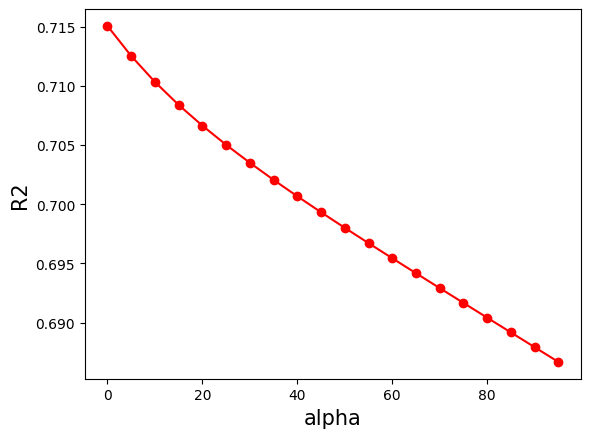

In [15]:
# inicializa listas para armazenar os valores de R² e alpha correspondentes
vR2 = []
valpha = []

# variamos os valores de alpha de 0 a 95, com incrementos de 5
for alpha in np.arange(0, 100, 5):
    # inicializa o modelo de regressao Ridge com o valor atual de alpha
    ridge2 = Ridge(alpha=alpha)

    # ajusta o modelo Ridge aos dados de treinamento
    ridge2.fit(X_train, y_train)

    # faz previsoes no conjunto de teste usando o modelo ajustado
    y_pred = ridge2.predict(X_test)

    # calcula o coeficiente de determinação R² para o valor atual de alpha
    r2 = r2_score(y_test, y_pred)

    # armazena o valor de R² na lista
    vR2.append(r2)

    # armazena o valor correspondente de alpha na lista
    valpha.append(alpha)

# plota R² em funcao de alpha
plt.plot(valpha, vR2, '-ro')  # '-ro' indica uma linha vermelha com marcadores circulares

# adiciona rotulo ao eixo x (valores de alpha)
plt.xlabel("alpha", fontsize=15)

# adiciona rótulo ao eixo y (valores de R²)
plt.ylabel("R2", fontsize=15)

# exibe o grafico
plt.show(True)

**LASSO**

In [17]:
from sklearn.model_selection import train_test_split

# define a fracao de elementos que serao utilizados no conjunto de teste
p = 0.3  # fração de 30% dos dados

# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

# inicializa o escalador padrao para normalizar os dados (media 0 e variância 1)
scaler = StandardScaler().fit(X_train)

# aplica a normalizacao aos dados de treinamento
X_train = scaler.transform(X_train)

# aplica a mesma normalizacao aos dados de teste (usando as estatisticas calculadas no treinamento)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# define o valor de alpha para a regularização Lasso
alpha = 1

# inicializa o modelo de regressão Lasso com o valor de alpha e um número máximo de iteracoes
lasso = Lasso(alpha=alpha, max_iter=100000)

# ajusta o modelo Lasso aos dados de treinamento
lasso.fit(X_train, y_train)

# faz previsoes no conjunto de teste usando o modelo ajustado
y_pred = lasso.predict(X_test)

# calcula o coeficiente de determinacao R² para avaliar o ajuste do modelo
R2 = r2_score(y_test, y_pred)
print('R2:', R2)  # Exibe o valor de R² (quanto mais próximo de 1, melhor o ajuste)

# calcula o erro quadrático medio (MSE) entre os valores preditos e os reais
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)  # exibe o MSE (quanto menor, melhor o ajuste)

R2: 0.643921345925214
RSME: 26.532522780751997


### **QUESTÃO 2**

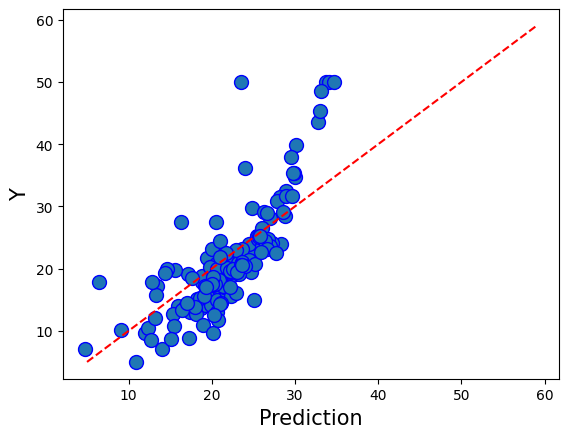

In [21]:
import matplotlib.pyplot as plt

# cria uma nova figura para o grafico
fig = plt.figure()

# plota os valores preditos versus os valores reais (originais) em um grafico de dispersao
l = plt.plot(y_pred, y_test, 'bo')  # 'bo' indica marcadores azuis

# ajusta o tamanho dos marcadores no grafico
plt.setp(l, markersize=10)

# define a cor interna dos marcadores
plt.setp(l, markerfacecolor='C0')

# adiciona rotulo ao eixo y
plt.ylabel("Y", fontsize=15)

# adiciona rotulo ao eixo x
plt.xlabel("Prediction", fontsize=15)

# gera uma linha de referência (linha y=x) para comparar predições com valores reais
xl = np.arange(min(y_test), 1.2*max(y_test), (max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')  # 'r--' indica uma linha tracejada vermelha

# exibe o gráfico
plt.show(True)

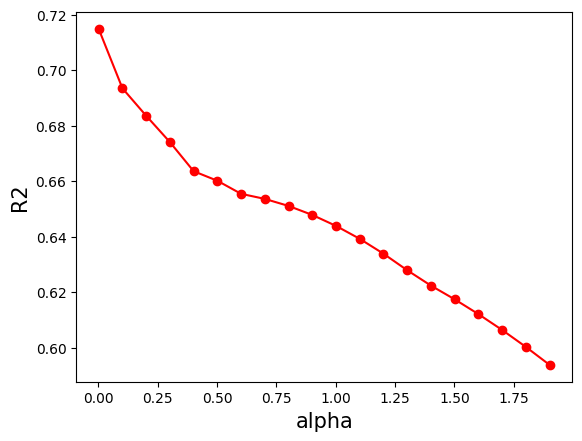

In [22]:
# inicializa listas para armazenar os valores de R² e os valores correspondentes de alpha
vR2 = []
valpha = []

# itera sobre uma faixa de valores de alpha, de 0.001 a 2, com incrementos de 0.1
for alpha in np.arange(0.001, 2, 0.1):
    # inicializa o modelo de regressão Lasso com o valor atual de alpha
    lasso = Lasso(alpha=alpha)

    # ajusta o modelo Lasso aos dados de treinamento
    lasso.fit(X_train, y_train)

    # faz previsoes no conjunto de teste usando o modelo ajustado
    y_pred = lasso.predict(X_test)

    # calcula o coeficiente de determinação R² para o valor atual de alpha
    r2 = r2_score(y_test, y_pred)

    # armazena o valor de R² na lista
    vR2.append(r2)

    # armazena o valor correspondente de alpha na lista
    valpha.append(alpha)

# plota R² em funcao de alpha
plt.plot(valpha, vR2, '-ro')  # '-ro' indica uma linha vermelha com marcadores circulares

# adiciona rotulo ao eixo x (valores de alpha)
plt.xlabel("alpha", fontsize=15)

# adiciona rotulo ao eixo y (valores de R²)
plt.ylabel("R2", fontsize=15)

# exibe o grafico
plt.show(True)

In [25]:
# ajusta o modelo Lasso com alpha = 0.2
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)

# imprime os coeficientes com os nomes das variaveis correspondentes
print('Coeficientes: ')
for name, coef in zip(list_labels[:-1], lasso.coef_):  # Exclui a última coluna que é a variável alvo
    print(f"{name}: {coef}")

Coeficientes: 
zn: 0.041980350852205306
indus: -0.0
chas: 0.7973621878915497
nox: -0.8012825674118892
rm: 3.0241198929851625
age: -0.0
dis: -1.308916181530077
rad: 0.0
tax: -0.0
ptratio: -1.8212144477235763
b: 0.870904354260608
lstat: -4.0480398988984945


### **QUESTÃO 3**

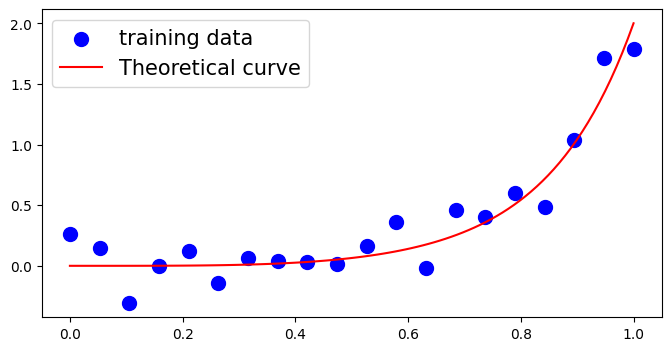

In [26]:
import numpy as np
from matplotlib import pyplot as plt

# define uma semente para o gerador de numeros aleatorios para reprodutibilidade
np.random.seed(10)

# funcao para gerar os dados (y = x^4 + x^9)
def function(x):
    y = x**4 + x**9
    return y

# conjunto de treinamento
N_train = 20  # numero de pontos no conjunto de treinamento
sigma = 0.2   # desvio padrao do ruido adicionado aos dados
x_train = np.linspace(0, 1, N_train)  # gera valores de x uniformemente espaçados entre 0 e 1
y_train = function(x_train) + np.random.normal(0, sigma, N_train)  # gera y com ruido
x_train = x_train.reshape(len(x_train), 1)  # ajusta o formato de x_train para ser uma matriz coluna

# cria uma figura para o grafico
fig = plt.figure(figsize=(8, 4))

# plota os dados de treinamento (x_train, y_train) como pontos azuis
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b",
            s=100, label="training data")

# conjunto de teste
N_test = 20  # numero de pontos no conjunto de teste
x_test = np.linspace(0, 1, N_test)  # gera valores de x uniformemente espaçados entre 0 e 1 para teste
y_test = function(x_test) + np.random.normal(0, sigma, N_test)  # gera y_test com ruido
x_test = x_test.reshape(len(x_test), 1)  # ajusta o formato de x_test para ser uma matriz coluna

# curva teorica
xt = np.linspace(0, 1, 100)  # gera 100 pontos para uma curva suave
yt = function(xt)  # calcula os valores da funcao teorica para os pontos gerados
plt.plot(xt, yt, '-r', label="Theoretical curve")  # plota a curva teorica em vermelho

# adiciona uma legenda ao grafico
plt.legend(fontsize=15)

# exibe o grafico gerado
plt.show(True)

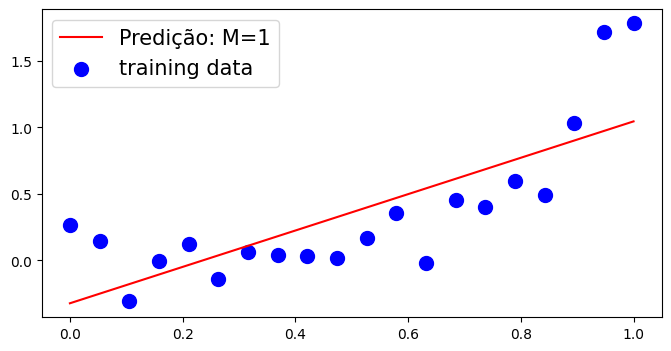

In [51]:
from sklearn import linear_model

# usa regressao linear para ajustar o modelo aos dados de treinamento
model = linear_model.LinearRegression()
model.fit(x_train, y_train)  # ajusta o modelo usando os dados de treinamento

# gera novos valores de x para prever y (usando o modelo ajustado)
xplot = np.linspace(0, 1, 200)  # gera 200 pontos uniformemente espaçados entre 0 e 1
xplot = xplot.reshape(len(xplot), 1)  # ajusta o formato de xplot para ser uma matriz coluna
Y_pred = model.predict(xplot)  # usa o modelo treinado para prever y para os novos valores de x

# mostra os resultados graficamente
fig = plt.figure(figsize=(8, 4))

# plota a linha de predicao gerada pelo modelo linear em vermelho
plt.plot(xplot, Y_pred, label='Predição: M=1', color='red')

# plota os dados de treinamento originais como pontos azuis
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100,
            label="training data")

# adiciona uma legenda ao grafico
plt.legend(fontsize=15)

# exibe o grafico gerado
plt.show(True)

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# cria uma matriz de atributos polinomiais de grau 3 a partir de x_train
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train)  # transforma x_train em uma matriz de caracteristicas polinomiais

# exibe a matriz de atributos polinomiais gerada
print('X^0             X^1          Xˆ2         Xˆ3')
print(X)

# inicializa e ajusta o modelo de regressao linear usando os atributos polinomiais
model = linear_model.LinearRegression()
model.fit(X, y_train)  # ajusta o modelo usando os dados de treinamento transformados

# transforma os novos valores de x (xplot) para polinomios de grau 3 para predicao
Xplot = poly3.fit_transform(xplot)  # aplica a mesma transformacao polinomial a xplot

X^0             X^1          Xˆ2         Xˆ3
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.26315789e-02 2.77008310e-03 1.45793847e-04]
 [1.00000000e+00 1.05263158e-01 1.10803324e-02 1.16635078e-03]
 [1.00000000e+00 1.57894737e-01 2.49307479e-02 3.93643388e-03]
 [1.00000000e+00 2.10526316e-01 4.43213296e-02 9.33080624e-03]
 [1.00000000e+00 2.63157895e-01 6.92520776e-02 1.82242309e-02]
 [1.00000000e+00 3.15789474e-01 9.97229917e-02 3.14914711e-02]
 [1.00000000e+00 3.68421053e-01 1.35734072e-01 5.00072897e-02]
 [1.00000000e+00 4.21052632e-01 1.77285319e-01 7.46464499e-02]
 [1.00000000e+00 4.73684211e-01 2.24376731e-01 1.06283715e-01]
 [1.00000000e+00 5.26315789e-01 2.77008310e-01 1.45793847e-01]
 [1.00000000e+00 5.78947368e-01 3.35180055e-01 1.94051611e-01]
 [1.00000000e+00 6.31578947e-01 3.98891967e-01 2.51931768e-01]
 [1.00000000e+00 6.84210526e-01 4.68144044e-01 3.20309083e-01]
 [1.00000000e+00 7.36842105e-01 5.42936288e-01 4.00058318e-01]
 [1.000000

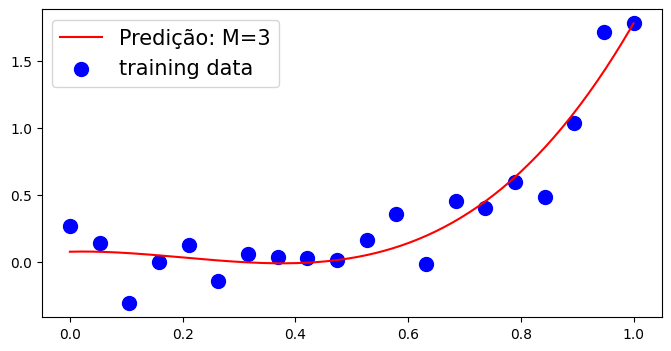

In [53]:
# usa o modelo polinomial ajustado para prever valores de y a partir dos dados transformados
Y_pred = model.predict(Xplot)

# cria uma nova figura para o grafico
fig = plt.figure(figsize=(8, 4))

# plota a linha de predição gerada pelo modelo polinomial de grau 3 em vermelho
plt.plot(xplot, Y_pred, label='Predição: M=3', color='red')

# plota os dados de treinamento originais como pontos azuis
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100,
            label="training data")

# adiciona uma legenda ao grafico para identificar a linha de predicao e os dados de treinamento
plt.legend(fontsize=15)

# exibe o gráfico gerado
plt.show(True)

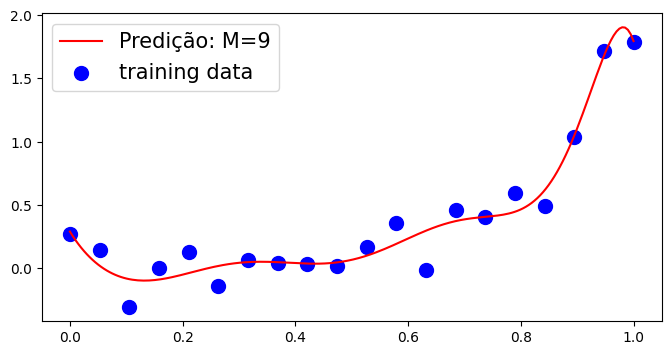

In [54]:
# cria uma matriz de atributos polinomiais de grau 9 a partir de x_train
poly9 = PolynomialFeatures(degree=9)

# transforma x_train em uma matriz de caracteristicas polinomiais
X = poly9.fit_transform(x_train)

# inicializa e ajusta o modelo de regressao linear usando os atributos polinomiais de grau 9
model = linear_model.LinearRegression()

# ajusta o modelo usando os dados de treinamento transformados
model.fit(X, y_train)

# transforma os novos valores de x (xplot) para polinomios de grau 9 para predição
Xplot = poly9.fit_transform(xplot)  # aplica a mesma transformacao polinomial a xplot

# usa o modelo polinomial ajustado para prever valores de y a partir dos dados transformados
Y_pred = model.predict(Xplot)

# cria uma nova figura para o grafico
fig = plt.figure(figsize=(8, 4))

# plota a linha de predicao gerada pelo modelo polinomial de grau 9 em vermelho
plt.plot(xplot, Y_pred, label='Predição: M=9', color='red')

# plota os dados de treinamento originais como pontos azuis
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100,
            label="training data")

# adiciona uma legenda ao grafico para identificar a linha de predicao e os dados de treinamento
plt.legend(fontsize=15)

# exibe o grafico gerado
plt.show(True)

In [55]:
# exibe os coeficientes
print("Coeficientes do modelo ajustado:", model.coef_)

Coeficientes do modelo ajustado: [ 0.00000000e+00 -7.30194590e+00  5.11670703e+01 -2.41919133e+02
  1.34224357e+03 -5.67339392e+03  1.37291743e+04 -1.80971211e+04
  1.21674066e+04 -3.26875013e+03]


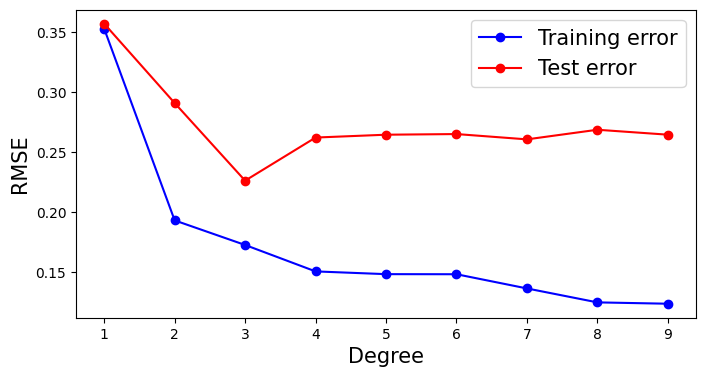

In [56]:
# funcao para calcular o erro quadratico medio (rmse)
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# listas que armazenam os erros de treinamento e teste de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = []  # lista que armazena os graus do polinomio

# itera sobre os graus de 1 a 9
for M in np.arange(1, 10):
    # inicializa o modelo de regressao linear
    model = linear_model.LinearRegression()

    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M)
    X_train = poly.fit_transform(x_train)

    # ajusta o modelo de regressao linear ao conjunto de treinamento
    model.fit(X_train, y_train)

    # prediz os valores de y no conjunto de treinamento
    Y_pred = model.predict(X_train)

    # calcula o erro de treinamento (rmse) e armazena
    error_train = rmse(Y_pred, y_train)
    training_errors.append(error_train)

    # transforma os dados de teste e prediz os valores de y no conjunto de teste
    X_test = poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)

    # calcula o erro de teste (rmse) e armazena
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)

    # armazena o grau do polinomio
    degree.append(M)

# cria uma nova figura para o grafico
fig = plt.figure(figsize=(8, 4))

# plota os erros de treinamento e teste em funcao do grau do polinomio
plt.plot(degree, training_errors, 'b-o', label='Training error')  # erros de treinamento em azul
plt.plot(degree, test_errors, 'r-o', label='Test error')  # erros de teste em vermelho

# adiciona rotulos aos eixos
plt.xlabel("Degree", fontsize=15)
plt.ylabel("RMSE", fontsize=15)

# adiciona uma legenda ao grafico para identificar as linhas de erro de treinamento e teste
plt.legend(fontsize=15)

# exibe o grafico gerado
plt.show(True)